<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 25px"> <b>Introduction for the project <br><br>
<span style="color:brown; font-size: 17px">
<div align="left"> As an analyst at a big online store. Together with the marketing department,<br> I've compiled a list of hypotheses that may help boost revenue.<br>
I need to prioritize these hypotheses, launch an A/B test, and analyze the results.<br>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# import sidetable
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import plotly
import os

from scipy import stats as st

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth',-1)

In [4]:
try:
    hypotheses_us=pd.read_csv('hypotheses_us.csv', sep=';',dtype={'Hypotheses': 'category'})
    orders_us=pd.read_csv('orders_us.csv', sep=',',parse_dates = ['date'])
    visits_us=pd.read_csv('visits_us.csv', sep=',',parse_dates = ['date'])
except:
    hypotheses_us=pd.read_csv('/datasets/hypotheses_us.csv', sep=';',dtype={'Hypotheses': 'category'})
    orders_us=pd.read_csv('/datasets/orders_us.csv', sep=',',parse_dates = ['date'])
    visits_us=pd.read_csv('/datasets/visits_us.csv', sep=',',parse_dates = ['date'])

orders_us.columns=orders_us.columns.str.lower()
visits_us.columns=visits_us.columns.str.lower()
hypotheses_us.columns=hypotheses_us.columns.str.lower()

orders_us.columns=orders_us.columns.str.replace(' ','_')
visits_us.columns=visits_us.columns.str.replace(' ','_')
hypotheses_us.columns=hypotheses_us.columns.str.replace(' ','_')

print('hypotheses')
hypotheses_us.info()
hypotheses_us.head()
hypotheses_us.describe()
print('orders')
orders_us.info()
orders_us.head()
orders_us.describe()
print('visits')
visits_us.info()
visits_us.head()
visits_us.describe()

hypotheses
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


,reach,impact,confidence,effort
count,9.000,9.000,9.000,9.000
mean,4.778,4.778,5.556,4.889
std,3.153,3.193,3.046,2.804
min,1.000,1.000,1.000,1.000
25%,3.000,3.000,3.000,3.000
50%,3.000,3.000,7.000,5.000
75%,8.000,7.000,8.000,6.000
max,10.000,10.000,9.000,10.000


orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400,B
1,2804400009,3642806036,2019-08-15,15.200,B
2,2961555356,4069496402,2019-08-15,10.200,A
3,3797467345,1196621759,2019-08-15,155.100,B
4,2282983706,2322279887,2019-08-15,40.500,B


,transactionid,visitorid,revenue
count,1197.000,1197.000,1197.000
mean,2155621385.530,2165960143.099,131.492
std,1229084904.760,1236014192.147,603.005
min,1062393.000,5114589.000,5.000
25%,1166775572.000,1111826046.000,20.800
50%,2145193898.000,2217984702.000,50.200
75%,3237740112.000,3177606451.000,130.400
max,4293855558.000,4283872382.000,19920.400


visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visits
count,62.000
mean,607.290
std,114.401
min,361.000
25%,534.000
50%,624.500
75%,710.500
max,770.000


# mistakes in the original datasets

- ***droping visitors registered in both groups***

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

In [5]:
orders_A = orders_us.query('group == "A"')
orders_B = orders_us.query('group == "B"')

In [6]:
both_groups=pd.merge(orders_A,orders_B,how='inner',on='visitorid')
both_groups.sample()
bad_list=both_groups['visitorid']

,transactionid_x,visitorid,date_x,revenue_x,group_x,transactionid_y,date_y,revenue_y,group_y
56,1415970216,4256040402,2019-08-31,80.500,A,453824282,2019-08-31,30.500,B


In [7]:
pd.Series(len(both_groups))


0    183
dtype: int64

In [8]:
full_roders=orders_us.copy()
orders_us=orders_us[~orders_us['visitorid'].isin(bad_list)]
orders_us.info()
full_roders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object 

<b> Now orders is filtered without the bad observations of users saved in both groups. <br><br>
We still have full_orders with the original data.

In [9]:
visits_us.sample()

,date,group,visits
14,2019-08-15,A,628


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB
percentiles: 90%, 95%, 99% [733.7  747.9  769.39]


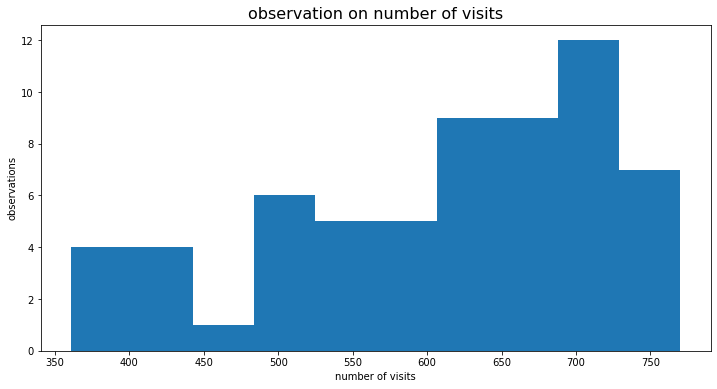

In [10]:
# checking visits:

visits_us=visits_us.drop_duplicates()
visits_us.info()
plt.rcParams["figure.figsize"]=(12,6)
plt.hist
plt.hist (visits_us['visits'])
plt.title('observation on number of visits', fontsize=16)
plt.xlabel('number of visits')
plt.ylabel('observations')

print('percentiles: 90%, 95%, 99%',np.percentile(visits_us['visits'],[90,95,99]));

<b> It doesn't seem like we have any outliers needed to be taken care of.

In [11]:
visits_us['date'].value_counts()

2019-08-27    2
2019-08-24    2
2019-08-08    2
2019-08-14    2
2019-08-20    2
2019-08-26    2
2019-08-01    2
2019-08-07    2
2019-08-13    2
2019-08-19    2
2019-08-25    2
2019-08-31    2
2019-08-06    2
2019-08-12    2
2019-08-18    2
2019-08-30    2
2019-08-21    2
2019-08-05    2
2019-08-11    2
2019-08-17    2
2019-08-23    2
2019-08-29    2
2019-08-04    2
2019-08-10    2
2019-08-16    2
2019-08-22    2
2019-08-28    2
2019-08-03    2
2019-08-09    2
2019-08-15    2
2019-08-02    2
Name: date, dtype: int64

<b> 31 observations with 2 groups each, like expected.

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

#  preprocess the data

## Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [12]:
hypotheses_us.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [13]:
hypotheses_us['ice_score']=hypotheses_us.impact*hypotheses_us.confidence/hypotheses_us.effort

In [14]:
hypotheses_us.sort_values(by='ice_score',ascending = False)

,hypothesis,reach,impact,confidence,effort,ice_score
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000


## Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority

In [15]:
hypotheses_us['rice_score']=hypotheses_us.reach*hypotheses_us.ice_score

In [16]:
hypotheses_us.sort_values(by='rice_score',ascending = False)

,hypothesis,reach,impact,confidence,effort,ice_score,rice_score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200,112.000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000,56.000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333,40.000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000,40.000
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200,16.200
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125,9.000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000,4.000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333,4.000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000,3.000


## Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.

<b>
- By using RICE the priority changes it's order but the first 4 hypothesis still having their place but in different order, and the fifth one kept it's place in both cases <br><br>
we use ice model when we don't feel the need to differentiate between reach and impact. in some occasions reaching people is our goal and thats our impact, ICE will be good for that,but in an online store, we will need the newer calculation RICE, which is taking in account both reach and impact.<br><br>
I've read that Rice is gaining popularity over ICE because it differentiate between impact and reach, whereas in the ICE model, both concepts get mushed together, so we will use RICE scoring when our team wants to differentiate between a feature that might have a big impact for a small audience vs. a small impact for a big audience.<br><br>
In our task for the online store it's better to take RICE as the proritizer.

<s> fig=px.scatter(hypotheses_us, x="ice_score", y="rice_score", color='hypothesis',width=1300, height=500,)
fig.update_layout(legend_tracegroupgap=12)

# Part 2. A/B Test Analysis

<b>
- Analyze the A/B test:

## Graph cumulative revenue by group. Make conclusions and conjectures.

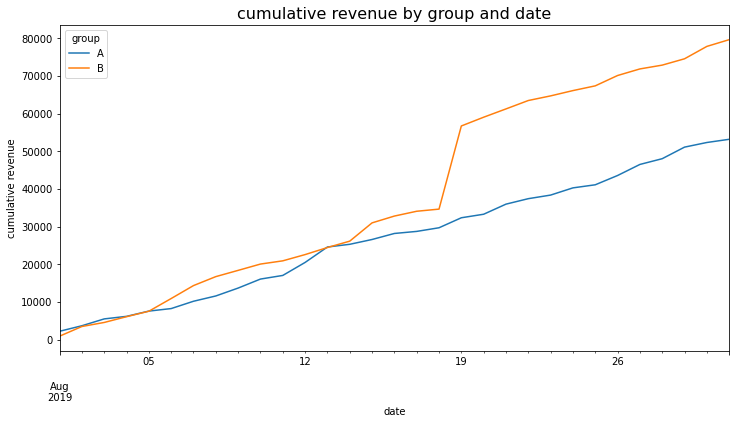

In [17]:
revenue_by_group=pd.pivot_table(orders_us, values='revenue',index='date',columns='group',aggfunc=np.sum)
cumulative_revenue_by_group=revenue_by_group.cumsum()
cumulative_revenue_by_group.sample()
cumulative_revenue_by_group.plot()
plt.rcParams["figure.figsize"]=(15,6)
plt.title('cumulative revenue by group and date',fontsize=16)
plt.xlabel('date')
plt.ylabel('cumulative revenue');

<b>
The cumulative metrics of group A are consistently lower than those of group B. At the beginning of the test, flunctuation in conversion was observed in both groups. The graph stabilized only toward the half of the test.<br><br>
Revenue is rising steadly throughout the whole test. That's a good sign. However, we can see that B group is doing better the whole way and after the half, it just constantly stays in a muchhigher point. This may imply either a surge in the number of oreders or the precence of very expensive orders in the sample.<br><br>
We will check for outliers later!

In [18]:
datesGroups = orders_us [['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x:
                                     orders_us[np.logical_and(orders_us['date']<=x['date'],
                                                              orders_us['group']==x['group'])].agg({'date':'max',
                                                                                                    'group':'max',
                                                                                                    'transactionid':
                                                                                     pd.Series.nunique,'visitorid':
                                                                                     pd.Series.nunique,
                                                                                                    'revenue':'sum'}),
                                     axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors
visitsAggregated = datesGroups.apply(lambda x:
                                     visits_us[np.logical_and(visits_us['date']<=x['date'],
                                                              visits_us['group']==x['group'])].agg({'date':'max',
                                                                                                    'group':'max',
                                                                                                    'visits':'sum'}),
                                     axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date','group'],right_on=['date','group'])
cumulativeData.columns=['date','group','orders','buyers','revenue','visitors']
cumulativeData.head(5)

#DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRvenueA=cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

#DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRvenueB=cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.600,719
1,2019-08-01,B,17,17,967.200,713
2,2019-08-02,A,42,36,3734.900,1338
3,2019-08-02,B,40,39,3535.300,1294
4,2019-08-03,A,66,60,5550.100,1845


## Graph cumulative average order size by group. Make conclusions and conjectures.


In [19]:
orders_us.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [20]:
orders_=orders_us.copy()
visits_=visits_us.copy()

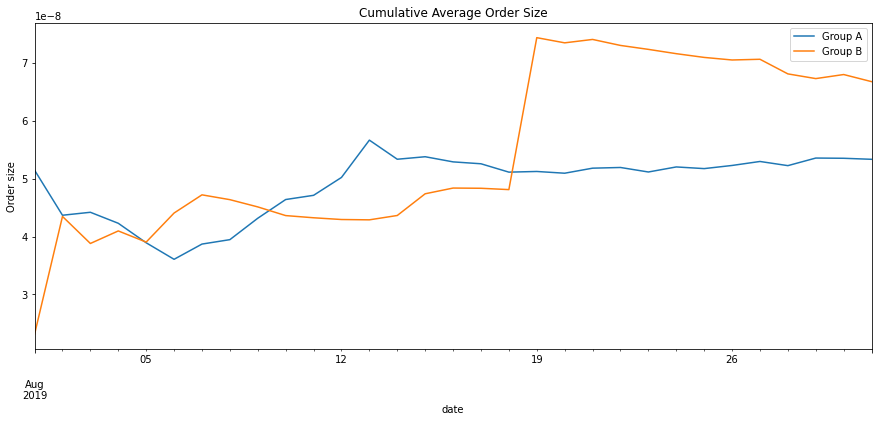

In [21]:
# remove visitors that have gotten into both groups A & B
# filtering double group visitors and grouping them in the list
doubles_list=list(orders_.groupby(['visitorid'])['group'].nunique().reset_index().query('group > 1')['visitorid'])

# filtering orders_ dataset by doubles list
orders_=orders_[~orders_['visitorid'].isin(doubles_list)]

# separating orders_ and visits_ tables by test groups
orders_a = orders_[orders_['group']=='A']
orders_b = orders_[orders_['group']=='B']
visits_a = visits_[visits_['group']=='A']
visits_b = visits_[visits_['group']=='B']

# calculating cumulative revenue
orders_a_rev=orders_a.groupby(['date'])['revenue'].sum().cumsum()
orders_b_rev=orders_b.groupby(['date'])['revenue'].sum().cumsum()

# calculating cumulative orders
orders_a_size=orders_a.groupby(['date'])['transactionid'].sum().cumsum()
orders_b_size=orders_b.groupby(['date'])['transactionid'].sum().cumsum()

# calculating cumulative order size
avg_orders_a=orders_a_rev/orders_a_size
avg_orders_b=orders_b_rev/orders_b_size

# visualizing
plt.rcParams["figure.figsize"]=(15,6)
plt.title('Cumulative Average Order Size')
avg_orders_a.plot(label='Group A')
avg_orders_b.plot(label='Group B')
plt.ylabel('Order size')
plt.legend();

<b> Average purchase size is not becoming steady during the test, only by the end of it both stater moving down together and this might mean that average purchase sizes are droping. we can see that both groups see spikes in revenue at certain points and it is switching all the time, staying steady around the same values but a small pick for A and a huge pick for B around 19 days since the beginning of the test. The surge in group B in the test may have have been due to the presence of large, expensive orders. We need more data on this group to find the true average purchase size and establish the level.<br><br>
And we could recommend to continue testing and see if average sizes stabelize. though it still looks like there is some kind of a general lead here for group B, we just need to check if it's not because of the anomalies.

## Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

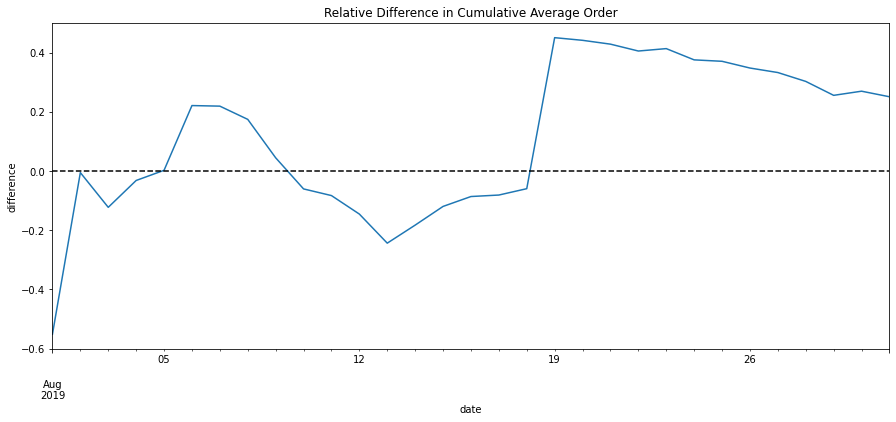

In [22]:
# calculating difference in cumulative order size
rel_diff=(avg_orders_b/avg_orders_a)-1

#visualising
plt.rcParams["figure.figsize"]=(15,6)
plt.title('Relative Difference in Cumulative Average Order')
rel_diff.plot(x='date')
plt.ylabel('difference')
plt.axhline(y=0,color='black',linestyle='--');

<b>
At several points the difference between the segments spikes, This means there must be some big orders and outlier! We will find them later.<br><br>
It seems like most of the time B is higher than A but this also changes along all the way.

## Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [23]:
orders_us.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400,B
1,2804400009,3642806036,2019-08-15,15.200,B
3,3797467345,1196621759,2019-08-15,155.100,B
4,2282983706,2322279887,2019-08-15,40.500,B
5,182168103,935554773,2019-08-15,35.000,B


In [24]:
visits_us.head()
number_visits_by_group=pd.pivot_table(visits_us,values='visits',index='date',columns='group',aggfunc=np.sum)
number_visits_by_group=pd.DataFrame(number_visits_by_group.to_records())
number_visits_by_group.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [25]:
orders_us.head()
number_orders_by_group=pd.pivot_table(orders_us,values='visitorid',index='date',columns='group',aggfunc=np.count_nonzero)
number_orders_by_group=pd.DataFrame(number_orders_by_group.to_records())
number_orders_by_group.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400,B
1,2804400009,3642806036,2019-08-15,15.200,B
3,3797467345,1196621759,2019-08-15,155.100,B
4,2282983706,2322279887,2019-08-15,40.500,B
5,182168103,935554773,2019-08-15,35.000,B


,date,A,B
0,2019-08-01,23,17
1,2019-08-02,19,23
2,2019-08-03,24,14
3,2019-08-04,11,14
4,2019-08-05,22,21


In [26]:
conversion_a=number_orders_by_group['A']/number_visits_by_group['A']

conversion_b=number_orders_by_group['B']/number_visits_by_group['B']

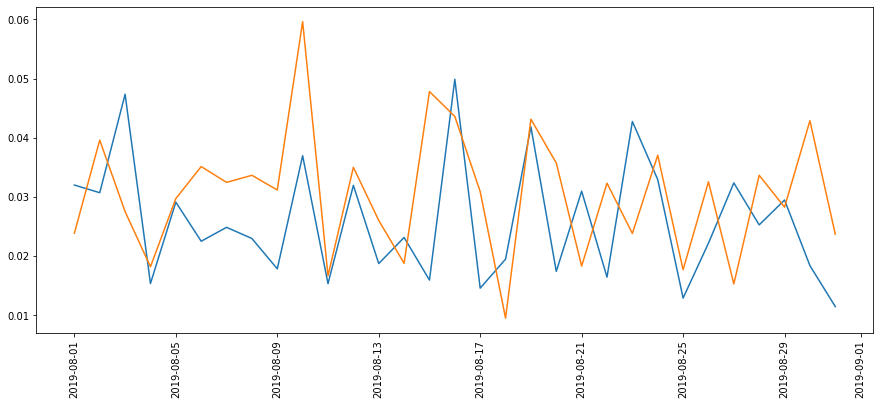

In [27]:
plt.plot(number_orders_by_group['date'],conversion_a, label='A')
plt.plot(number_orders_by_group['date'],conversion_b, label='B')
plt.xticks(rotation = 90);

<b>
It's hard to tell which segment is better, since the daily results fluctuate strongly.

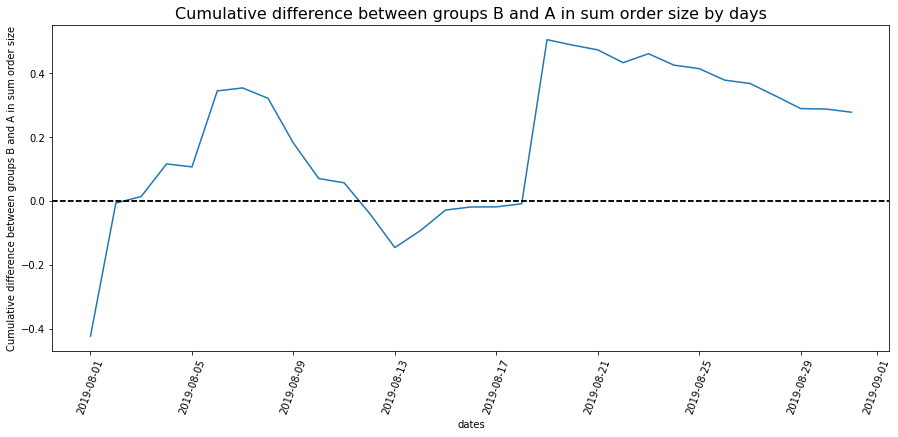

In [31]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRvenueA.merge(cumulativeRvenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Cumulative difference between groups B and A in sum order size by days', fontsize = 16)
plt.xlabel('dates')
plt.ylabel('Cumulative difference between groups B and A in sum order size')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=70);

## Plot a scatter chart of the number of orders per user. Make conclusions and conjectures

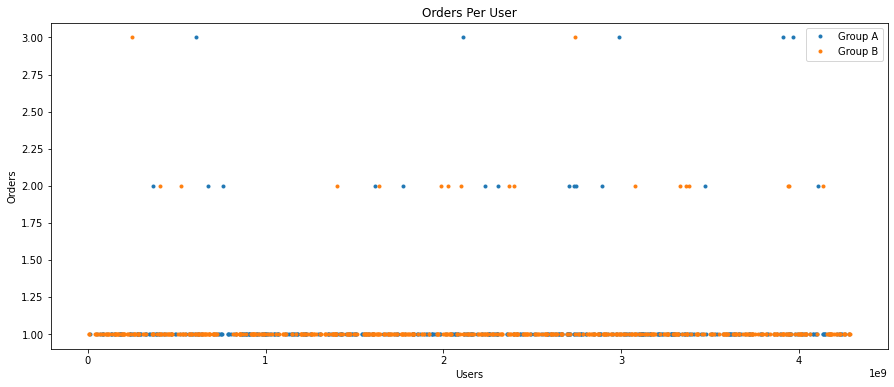

In [27]:
# calculating number of orders per user
ord_user=orders_.groupby(['visitorid'])['transactionid'].count()
ord_user_a=orders_a.groupby(['visitorid'])['transactionid'].count()
ord_user_b=orders_b.groupby(['visitorid'])['transactionid'].count()

# visualising
plt.rcParams["figure.figsize"]=(15,6)
plt.title('Orders Per User')
ord_user_a.plot(style='.',label='Group A')
ord_user_b.plot(style='.',label='Group B')
plt.ylabel('Orders')
plt.xlabel('Users')
plt.legend();

<b>
Here we notice that many buyers buying 1 order and fewer 2 orders and rarely 3 orders

## Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [28]:
print('percentiles: 90%, 95%, 99%',np.percentile(ord_user,[90,95,99]));

percentiles: 90%, 95%, 99% [1. 1. 2.]


<b>
Most of our users had only 1 order, only 10% had more and within this 10% we see that just only the 1 last percent is having 2 orders or more, so any user who orders more than 1 is an anomaly.<br><br>
This takes us back to the recommendation of finding ways to attract customers to come back or give better service.

## Plot a scatter chart of order prices. Make conclusions and conjectures.

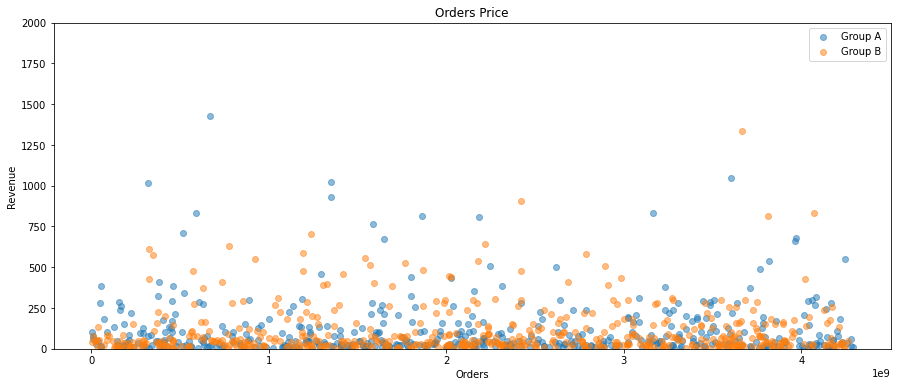

In [29]:
# visualising order prices
plt.rcParams["figure.figsize"]=(15,6)
plt.title('Orders Price')
plt.scatter(orders_a['transactionid'],orders_a['revenue'],label='Group A',alpha=0.5)
plt.scatter(orders_b['transactionid'],orders_b['revenue'],label='Group B',alpha=0.5)
plt.ylabel('Revenue')
plt.xlabel('Orders')
plt.ylim(0,2000)
plt.legend();

<b>
We can see that most of our observations had revenues lower than 2500 and seems like lower by a lot but we can't really tell<br><br>
We see 2 anomalie pointsat around 2500 and 20000 which is a lot! we should check if those were mistakes in the data and in general if our service was a one payment for lifetime then we would assume those were mistakes, but from what I understand we are just not that good with keeping customers and making them want to come and buy more from us.

## Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [30]:
print('percentiles: 90%, 95%, 99%',np.percentile(orders_us['revenue'],[90,95,99]));
orders_us.head()

percentiles: 90%, 95%, 99% [280.8   414.275 830.3  ]


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.400,B
1,2804400009,3642806036,2019-08-15,15.200,B
3,3797467345,1196621759,2019-08-15,155.100,B
4,2282983706,2322279887,2019-08-15,40.500,B
5,182168103,935554773,2019-08-15,35.000,B


<b>
We can see that that 90% of our observasions had revenues lower than 280.8, which means only 10% had more than that.<br><br>
Within these 10% only 5% had more than 414.275 and 1% over 830.3.<br><br>
most of our orders are for less than 280, higher orders are rare but get even higher than 830. we should look for ways to make the average order bring more revenue.

## Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

<b>
H0: proportions of trials(visits) and successes(orders) are equal for both groups.<br>
H1: proportions of trials and successes are not equal for both groups.

In [31]:
alpha=0.05
ordersByUsersA=orders_us[orders_us['group']=='A'
                        ].groupby('visitorid',as_index='False').agg({'transactionid':pd.Series.nunique}).reset_index()
ordersByUsersA.columns = ['visitorid','transactionid']

ordersByUsersB=orders_us[orders_us['group']=='B'
                        ].groupby('visitorid',as_index='False').agg({'transactionid':pd.Series.nunique}).reset_index()
ordersByUsersB.columns = ['visitorid','transactionid']

SampleA=pd.concat([ordersByUsersA['transactionid'],pd.Series(0,
                                                             index=np.arange(visits_us[visits_us['group']=='A']
                                                                             ['visits'].sum()-len(ordersByUsersA[
                                                                                 'transactionid'])),name='transactionid')]
                  ,axis=0)

SampleB=pd.concat([ordersByUsersB['transactionid'],pd.Series(0,
                                                             index=np.arange(visits_us[visits_us['group']=='B']
                                                                             ['visits'].sum()-len(ordersByUsersB[
                                                                                 'transactionid'])),name='transactionid')]
                  ,axis=0)

print('Relative Gain: ', "{0:.3f}".format(SampleB.mean()/SampleA.mean()-1))

result=st.mannwhitneyu(SampleA,SampleB)[1]

print('p-value: ', "{0:.3f}".format(result))

if (result<alpha):
    print('we reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

Relative Gain:  0.160
p-value:  0.011
we reject the null hypothesis


In [32]:
SampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: transactionid, Length: 18736, dtype: int64

<b>
Based on the raw data, there is a difference between group A and B and we reject the null hypothesis that they are the same.<br><br>
The first row of the output gives us the P-value 0.011, which is smaller than 0.05. So we reject the null hypothesis that there is not a statistically significant difference in conversion between the groups.<br><br>
And the relative gain of group B is 16% (the second row of the output).

## Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

<b>
H0: proportions of trials(visits) and successes(orders) are equal for both groups.<br>
H1: proportions of trials and successes are not equal for both groups.

In [33]:
print('significance_of_difference: ', "{0:.3f}".format(orders_us[orders_us['group']=='B']['revenue'].mean()/orders_us[orders_us['group']=='A']['revenue'].mean()-1))

result=st.mannwhitneyu(orders_us[orders_us['group']=='A']['revenue'],orders_us[orders_us['group']=='B']['revenue'])[1]

print('p-value: ', "{0:.3f}".format(result))

if (result<alpha):
    print('we reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

significance_of_difference:  0.278
p-value:  0.862
we can't reject the null hypothesis


In [34]:
print('Group A orders revenue mean:', "{0:.3f}".format(orders_a['revenue'].mean()))
print('Group B orders revenue mean:', "{0:.3f}".format(orders_b['revenue'].mean()))

Group A orders revenue mean: 113.701
Group B orders revenue mean: 145.349


<b>
The P-value(0.862) is considerably higher than 0.05, so there is no reason to reject the null hypothesis and conclude that average order size differs between the groups.<br>
Nonetheless, the average order size for group B is bigger than it is for group A at some points and have bigger picks.<br>
If I understood right, then 0.278 means that the average order size for group B is 27.8% bigger than the size for group A. We can also see it from just calculating the means that B has a bigger mean, this probably refers to the pick points we saw earlier.

## Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [35]:
# lets see how many anomalous behaviours we have recorded:
usersWithManyOrders=pd.concat([ordersByUsersA[ordersByUsersA['transactionid']>1]['visitorid'],ordersByUsersB[ordersByUsersB['transactionid']>1]['visitorid']],axis=0)
usersWithExpensiveOrders=orders_us[orders_us['revenue']>414.275]['visitorid']
abnormalUsers=pd.concat([usersWithManyOrders,usersWithExpensiveOrders],axis=0).drop_duplicates().sort_values()
abnormalUsers.head(5)
abnormalUsers.shape

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorid, dtype: int64

(86,)

<b>
We have 86 anomalous users in total, Thats a lot and they probably really affected our results from the tests.<br>
Lets check the results without these anomalies!<br>

In [36]:
SampleAFiltered=pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0,index=np.arange(visits_us[visits_us['group']=='A']['visits'].sum()-len(ordersByUsersA['visitorid'])),name='transactionid')],axis=0)

SampleBFiltered=pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0,index=np.arange(visits_us[visits_us['group']=='B']['visits'].sum()-len(ordersByUsersB['visitorid'])),name='transactionid')],axis=0)


print('Relative Gain: ', "{0:.3f}".format(SampleBFiltered.mean()/SampleAFiltered.mean()-1))

result=st.mannwhitneyu(SampleAFiltered,SampleBFiltered)[1]

print('p-value: ', "{0:.3f}".format(result))

if (result<alpha):
    print('we reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

Relative Gain:  0.174
p-value:  0.016
we reject the null hypothesis


<b>
Old results:<br>
0.006<br>0.016<br><br>
The results for conversion almost didn't change and the results are still the same, P-value is smaller than 0.05, relative gain is now 17.4%.<br><br>
We still reject the null hypothesis and meaning the group had differences between them in the results and that our test has a meaning.

## Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [60]:
print('significance_of_difference: ', "{0:.3f}".format(orders_us[np.logical_and(orders_us['group']=='B',np.logical_not(orders_us['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/orders_us[np.logical_and(orders_us['group']=='A',np.logical_not(orders_us['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1))

A1=np.logical_and(orders_us['group']=='A',np.logical_not(orders_us['visitorid'].isin(abnormalUsers)))
AA=orders_us[A1]['revenue']
      
B1=np.logical_and(orders_us['group']=='B',np.logical_not(orders_us['visitorid'].isin(abnormalUsers)))
BB=orders_us[B1]['revenue']
      
result = st.mannwhitneyu(AA,BB)[1]

print('p-value: ', "{0:.3f}".format(result))

if (result<alpha):
    print('we reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

significance_of_difference:  -0.033
p-value:  0.771
we can't reject the null hypothesis


<b>
Old results:<br>
0.431<br>0.278<br><br>
The P-value increased but it doesn't really matters, but now the difference between the segments is -3.3% instead of 27.8%.<br><br>
We still can't reject the null hypothesis meaning the average of order sizes between the groups doesn't have a significant differece.<br><br>
If I understood right, then -0.033 means that the average order size for group B is -3.3% smaller than the size of it for group A.<br><br>
So taking care of our anomalies helped us to understand that group A is actually the leader.

## Make a decision based on the test results. The possible decisions are:
- <b> Stop the test, consider one of the groups the leader.
- Stop the test, conclude that there is no difference between the groups.
- Continue the test.

<b>
From our graphs we conclude that group B has higher cumulative revenue by group and date, and higher cumulative average order size by group and date (both might depend on outliers?), Also seems that group B has a much better conversion rate.<br><br>
When we looked for anomalieswe found out that any user who ordered more than 1 order or with revenue of more tha 414.275, is an anomaly. We will check if these anomalies affected our scores.<br><br>
Then we did some tests, based on the raw data, there is a difference in conversion between the 2 groups A & B and relative gain is 16% positive for B.<br><br>
Then we test for significance of the difference in conversion between the groups using the raw data and discovered the P-Value (0.43) is considerably high, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups but still that group B might have bigger picks.<br><br>
Then we found the statistical of the difference in conversion between the groups using the filtered data, discovering we had 86 outliers.<br><br>
The results for conversion almost didn't change and the results are still the same.<br><br>
So, as I understood I will decide to continue the test.